# Corrective Gradient Refinement Trajectory Plot vs Odometry
----


In [22]:
import sframe # Graphlab/Turi Sframe
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
import rosbag

## Intel Dataset

### 5 particles

In [34]:
odom_data = sframe.SFrame('/home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv')

Finished parsing file /home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv

Parsing completed. Parsed 100 lines in 0.009777 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv

Parsing completed. Parsed 1298 lines in 0.0098 secs.

In [28]:
# The geometry/PoseArray Msg cannot directly export to CSV from rostopic echo -p
# Due to Messege Size inconsistency
def extract_trajectory_sframe_from_pose_array(bagfile, topic):
    bag = rosbag.Bag(bagfile)
    cache = None
    for topic, msg, t in bag.read_messages(topics=[topic]):
    # print msg
        cache = msg

    bag.close()
    traj_pose_headers = {'field.pose.position.x':[], 'field.pose.position.y':[], 
                     'field.pose.position.z':[], 'field.pose.orientation.x':[], 
                     'field.pose.orientation.y':[],'field.pose.orientation.z':[],
                     'field.pose.orientation.w':[]}

    for pose in cache.poses:
        traj_pose_headers['field.pose.position.x'].append(pose.position.x)
        traj_pose_headers['field.pose.position.y'].append(pose.position.y)
        traj_pose_headers['field.pose.position.z'].append(pose.position.z)
        traj_pose_headers['field.pose.orientation.x'].append(pose.orientation.x)
        traj_pose_headers['field.pose.orientation.y'].append(pose.orientation.y)
        traj_pose_headers['field.pose.orientation.z'].append(pose.orientation.z)
        traj_pose_headers['field.pose.orientation.w'].append(pose.orientation.w)

    return sframe.SFrame(traj_pose_headers)

In [30]:
traj_data = extract_trajectory_sframe_from_pose_array('/home/kandithws/Desktop/robio result/intel/5 particle/slam_log_2017-07-04-13-30-36.bag', '/best_particle_trajectory')

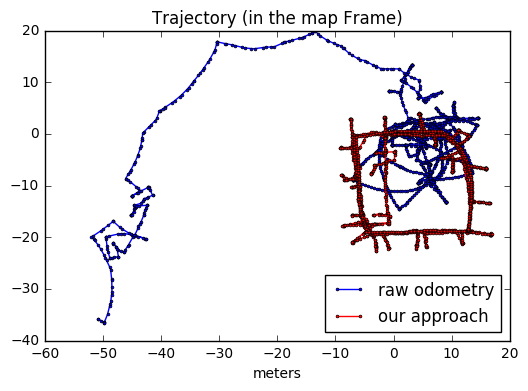

In [72]:
plt.figure()
plt.plot(odom_data['field.pose.position.x'], odom_data['field.pose.position.y'], '-bo', 
         markersize=2, label='raw odometry')
plt.plot(traj_data['field.pose.position.x'], traj_data['field.pose.position.y'], '-ro',
         markersize=2, label='our approach')
# plt.plot(x=odom_data['field.pose.position.x'], y=odom_data['field.pose.position.y'], c='r')
# plt.plot(x=traj_data['field.pose.position.x'], y=traj_data['field.pose.position.y'], c='b')
plt.legend(loc='lower right')
plt.title('Trajectory (in the map Frame)')
plt.xlabel('meters')
plt.ylabel('', fontsize=16)

In [35]:
odom_data

%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose.position.x,field.pose.position.y
976052857349017042,0,976052857337530016,odom,0.0,0.0
976052886832391994,1,976052886581874966,odom,0.341,-0.007
976052888565078437,2,976052888372557997,odom,0.703,-0.015
976052890660636717,3,976052890445780038,odom,0.697,-0.014
976052891798669161,4,976052891565788030,odom,0.699,-0.017
976052893007824369,5,976052892765064001,odom,0.697,-0.011
976052894972754341,6,976052894779245972,odom,0.695,0.008
976052896584799056,7,976052896365810990,odom,0.704,0.027
976052898802279374,8,976052898601112008,odom,0.72,0.037
976052898993631731,9,976052898794432997,odom,0.725,0.038


In [36]:
odom_data['field.pose.position.x']

dtype: float
Rows: 1298
[0.0, 0.341, 0.703, 0.697, 0.699, 0.697, 0.695, 0.704, 0.72, 0.725, 0.733, 0.735, 0.737, 0.738, 0.739, 0.747, 0.767, 1.268, 1.485, 1.99, 2.048, 2.543, 2.599, 2.863, 3.333, 3.795, 4.272, 4.527, 4.692, 4.913, 5.405, 5.882, 6.355, 6.833, 7.309, 7.77, 8.197001, 8.201, 8.229, 8.271, 8.299, 8.305, 8.313, 8.309, 8.285999, 8.264, 8.212, 8.196, 8.022, 7.796, 7.444, 7.263, 6.973, 6.846, 6.45, 6.216, 5.978, 5.534, 5.069, 4.594, 4.217, 4.164, 3.669, 3.165, 2.881, 2.333, 1.959, 1.405, 1.05, 0.524, 0.033, -0.426, -0.834, -1.356, -1.525, -2.047, -2.561, -2.901, -3.405, -3.933, -4.451, -4.916, -5.426, -5.893, -6.351, -6.807, -7.028, -7.027, -7.028, -7.027, -7.025, -7.025, -7.022, -7.021, -7.004, -6.998, -6.82, -6.705, -6.494, -6.259, ... ]